# Henry Pham
# Project 6 - Predicting Chicago Crimes Using Time Series

In [1]:
# ---- Project 6 ----

# Introduction

In [2]:
# The objective of this project is to develop an accurate and proactive predictive model for forecasting crime incidents in the city of Chicago using advanced time series analysis techniques. 
# Accurate predictions of crime occurrences in Chicago are essential for law enforcement agencies, city planners, and policymakers aiming to enhance public safety and allocate resources effectively. 
# By harnessing the power of time series analysis and historical crime data, this project seeks to provide valuable insights and predictive capabilities that can assist in crime prevention and response strategies.

# The driving force behind this project is the recognition of the profound value that accurate crime predictions can offer to law enforcement agencies and the community. 
# By adopting a data-driven approach, rigorous methodology, and ethical data usage practices, I aim to provide actionable insights that empower stakeholders to make informed decisions related to crime prevention and response.

# Data Sources

In [3]:
# ChicagoCrimes: https://www.kaggle.com/datasets/currie32/crimes-in-chicago

# Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

# Get Chicago Crimes Data

In [5]:
# Import few libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
with open('C:\\DSC680\\PracticeMachineLearning\\Chicago_Crimes_2012_to_2017.csv', 'r', errors='replace') as file:
    # Use DictReader to read CSV into a list of dictionaries
    reader = csv.DictReader(file)
    data = [row for row in reader]

In [7]:
# Convert the list of dictionaries to a DataFrame
ChicagoCrime_df = pd.DataFrame(data)

In [8]:
# Show few records
ChicagoCrime_df.head()

,,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073157,-87.706818608,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782921527,-87.60436317,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908283,-87.758371958,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885686845,-87.749515983,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297242,-87.761750709,"(41.886297242, -87.761750709)"


In [9]:
# Export and save the cpi dataset
ChicagoCrime_df.to_csv("C:\\DSC680\\PracticeMachineLearning\\chicagoCrimes.csv")

# Data Cleaning

In [10]:
# Read csv file using pandas
df = pd.read_csv('C:\\DSC680\\PracticeMachineLearning\\chicagoCrimes.csv')
# Show few records
df.head()

,Unnamed: 0,Unnamed: 1,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## Drop features that are not useful

In [11]:
# I would drop the following features:

# 'Id', 'CaseNumber', 'Block', 'IUCR', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
# 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
# 'Longitude', 'Location' : They do not provide any meaningful information related to the target variable.

df.drop(['ID', 'Case Number', 'Block','IUCR', 'Location Description',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],axis=1, inplace=True)

## Find shape of the dataset 

In [55]:
# Retrieve the dimensions of a DataFrame df
df.shape

(1456714, 6)

In [56]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1456714
Number of Columns 6


## Get information About the dataset

In [57]:
# Provide a concise summary of the DataFrame df, including information about the index, column data types, 
# non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456714 entries, 2016-05-03 23:40:00 to 2016-05-03 23:38:00
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Unnamed: 0    1456714 non-null  int64         
 1   Unnamed: 1    1456714 non-null  int64         
 2   Date          1456714 non-null  datetime64[ns]
 3   Primary Type  1456714 non-null  object        
 4   Description   1456714 non-null  object        
 5   Arrest        1456714 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 68.1+ MB


## Check missing values

In [58]:
# Calculate the number of missing values (null values) in each column of the DataFrame df
df.isnull().sum()

Unnamed: 0      0
Unnamed: 1      0
Date            0
Primary Type    0
Description     0
Arrest          0
dtype: int64

In [59]:
# There is no missing values in the dataset.

## Check duplicates

In [60]:
# Count the number of duplicated rows in the DataFrame df
df.duplicated().sum()

0

In [61]:
# There is no duplicates

## List col names in the dataset.

In [62]:
for col in df:
    print(col)

Unnamed: 0
Unnamed: 1
Date
Primary Type
Description
Arrest


## Convert Date column to Datetime column

In [63]:
# Convert the 'Date' column in the DataFrame df from a string representation to a datetime format
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [64]:
# Show few records
df.head()

,Unnamed: 0,Unnamed: 1,Date,Primary Type,Description,Arrest
Date,,,,,,
2016-05-03 23:40:00,0,3,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,True
2016-05-03 21:40:00,1,89,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,False
2016-05-03 23:31:00,2,197,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False
2016-05-03 22:10:00,3,673,2016-05-03 22:10:00,BATTERY,SIMPLE,False
2016-05-03 22:00:00,4,911,2016-05-03 22:00:00,THEFT,$500 AND UNDER,False


## Univariate Analysis

In [65]:
# list columns
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Date', 'Primary Type', 'Description',
       'Arrest'],
      dtype='object')

In [66]:
# Count the occurrences of each unique value in the 'Primary Type' column of the DataFrame df, 
# and then display the top 10 most frequent values. 
df['Primary Type'].value_counts().head(10)

THEFT                  329460
BATTERY                263700
CRIMINAL DAMAGE        155455
NARCOTICS              135240
ASSAULT                 91289
OTHER OFFENSE           87874
BURGLARY                83397
DECEPTIVE PRACTICE      75495
MOTOR VEHICLE THEFT     61138
ROBBERY                 57313
Name: Primary Type, dtype: int64

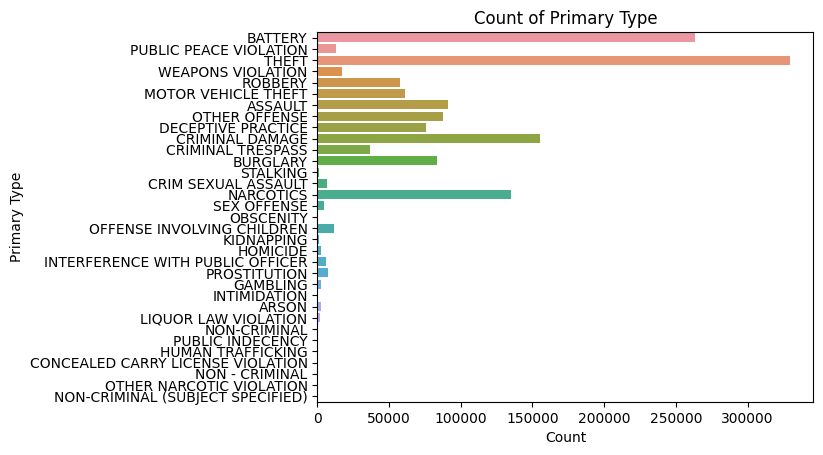

In [67]:
# Import few libraries
import seaborn as sns
import matplotlib.pyplot as plt

# This line creates a count plot using seaborn's countplot() function. 
# It specifies the 'Primary Type' column as the variable to be counted along the y-axis and uses the DataFrame df as the data source.
sns.countplot(y='Primary Type', data=df)
# These lines set the title of the plot ('Count of Primary Type'), the label for the y-axis ('Primary Type'), 
# and the label for the x-axis ('Count').
plt.title('Count of Primary Type')
plt.ylabel('Primary Type')
plt.xlabel('Count')
# Display the plot
plt.show()

In [68]:
# Count the occurrences of each unique value in the 'Arrest' column of the DataFrame df
df['Arrest'].value_counts()

False    1079242
True      377472
Name: Arrest, dtype: int64

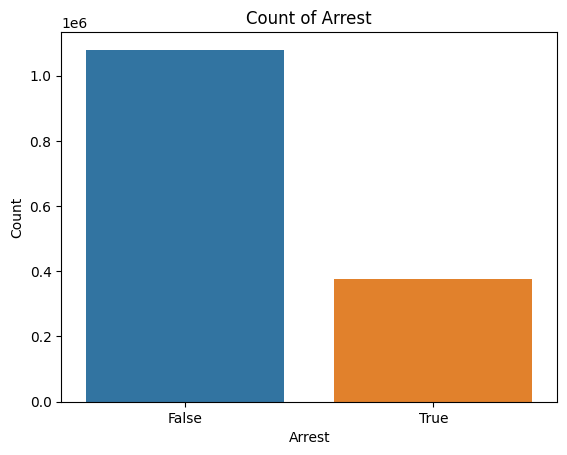

In [69]:
# Import few libraries
import seaborn as sns
import matplotlib.pyplot as plt
# This line creates a count plot using seaborn's countplot() function. 
# It specifies the 'Arrest' column as the variable to be counted along the x-axis and uses the DataFrame df as the data source.
sns.countplot(x='Arrest', data=df)
# These lines set the title of the plot ('Count of Arrest'), the label for the x-axis ('Arrest'), and the label for the y-axis ('Count').
plt.title('Count of Arrest')
plt.xlabel('Arrest')
plt.ylabel('Count')
# Display the plot
plt.show()

## Time Series Count

In [70]:
# Replace index with Date
df.index = pd.DatetimeIndex(df.Date)
# Show few records
df.head()

,Unnamed: 0,Unnamed: 1,Date,Primary Type,Description,Arrest
Date,,,,,,
2016-05-03 23:40:00,0,3,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,True
2016-05-03 21:40:00,1,89,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,False
2016-05-03 23:31:00,2,197,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False
2016-05-03 22:10:00,3,673,2016-05-03 22:10:00,BATTERY,SIMPLE,False
2016-05-03 22:00:00,4,911,2016-05-03 22:00:00,THEFT,$500 AND UNDER,False


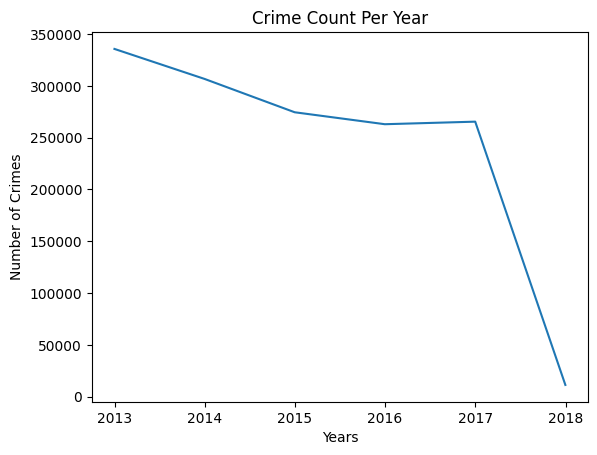

In [71]:
# This line resamples the DataFrame df by year ('Y') and then calculates the size (count) of each group. 
# The resample() method is used to aggregate the data by year, and .size() returns the number of elements in each group.
plt.plot(df.resample('Y').size())
# These lines set the title of the plot ("Crime Count Per Year") and label the x-axis ("Years") and y-axis ("Number of Crimes").
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")
# Display the plot
plt.show()

In [72]:
# As time goes by, the Chicago crimes has decreased.

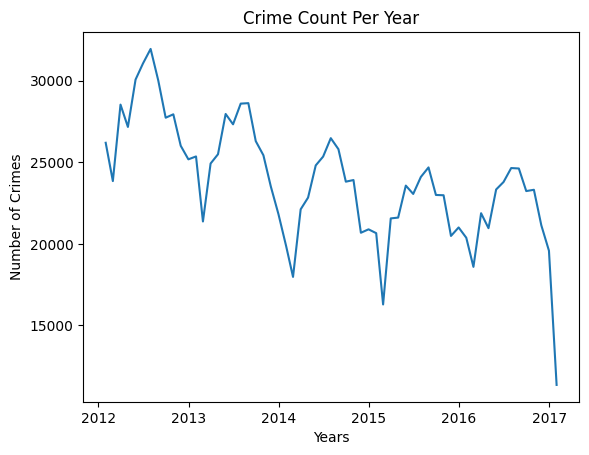

In [73]:
# This line resamples the DataFrame df by month ('M') instead of by year as stated in the comments. 
# It calculates the size (count) of each group, resulting in the number of crimes per month. plt.plot()
plt.plot(df.resample('M').size())
# These lines set the title of the plot ("Crime Count Per Year"), 
# but it should be noted that the plot is actually showing the crime count per month, not per year. 
# The x-axis label is set to "Years", which may be incorrect if the data represents monthly crime counts. The y-axis label is correctly set to "Number of Crimes".
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")
# Display the plot
plt.show()

In [75]:
# As time goes by, the Chicago crimes indeed has decreased.

## Preparing The data

In [31]:
# Create a new DataFrame df_prophet that aggregates the data in the DataFrame df by month ('M') 
# and counts the number of occurrences for each month.
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [76]:
# Assign new column names to the DataFrame df_prophet
df_prophet.columns =['Date','Crime Count']

In [77]:
# Show few records
df_prophet.head()

,Date,Crime Count
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067


## Rename The Columns

In [78]:
# Rename the columns of the DataFrame df_prophet from 'Date' to 'ds' and from 'Crime Count' to 'y'.
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [79]:
# Show the result
df_prophet

,ds,y
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


## Train The Model

In [80]:
# This line creates an instance of the Prophet class and assigns it to the variable model
model = Prophet()
# This line fits the Prophet model to the data contained in the DataFrame df_prophet. 
# The .fit() method trains the model on the historical data provided as input.
model.fit(df_prophet)

09:33:40 - cmdstanpy - INFO - Chain [1] start processing
09:33:40 - cmdstanpy - INFO - Chain [1] done processing


## Make The Predictions

In [81]:
# This line creates a DataFrame pred containing future dates for which I want to make predictions
# The periods parameter specifies the number of future periods (in this case, 36)
# The freq parameter specifies the frequency of the dates, with 'M' indicating monthly frequency.
pred=model.make_future_dataframe(periods=36,freq='M')
# This line uses the fitted Prophet model (model) to make predictions for the future dates contained in the DataFrame pred.
prediction = model.predict(pred)

In [82]:
# Show the result
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29528.009355,25827.096659,28322.046931,29528.009355,29528.009355,-2468.467606,-2468.467606,-2468.467606,-2468.467606,-2468.467606,-2468.467606,0.0,0.0,0.0,27059.541749
1,2012-02-29,29341.464246,23451.079945,25852.983296,29341.464246,29341.464246,-4698.877805,-4698.877805,-4698.877805,-4698.877805,-4698.877805,-4698.877805,0.0,0.0,0.0,24642.586441
2,2012-03-31,29142.053956,26911.399803,29406.708586,29142.053956,29142.053956,-962.784957,-962.784957,-962.784957,-962.784957,-962.784957,-962.784957,0.0,0.0,0.0,28179.268999
3,2012-04-30,28949.076258,25947.919711,28320.010939,28949.076258,28949.076258,-1744.512377,-1744.512377,-1744.512377,-1744.512377,-1744.512377,-1744.512377,0.0,0.0,0.0,27204.563881
4,2012-05-31,28749.665970,28491.619478,30885.461010,28749.665970,28749.665970,923.695781,923.695781,923.695781,923.695781,923.695781,923.695781,0.0,0.0,0.0,29673.361751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2019-09-30,18715.309455,17971.701397,20700.779102,18154.671996,19228.395214,677.902050,677.902050,677.902050,677.902050,677.902050,677.902050,0.0,0.0,0.0,19393.211505
93,2019-10-31,18631.611113,17669.497719,20299.285788,18045.590643,19168.512542,376.740781,376.740781,376.740781,376.740781,376.740781,376.740781,0.0,0.0,0.0,19008.351893
94,2019-11-30,18550.612716,14583.092261,17258.825555,17934.915401,19116.667335,-2553.858975,-2553.858975,-2553.858975,-2553.858975,-2553.858975,-2553.858975,0.0,0.0,0.0,15996.753742
95,2019-12-31,18466.914374,14985.692924,17747.293782,17818.765091,19064.855097,-2097.148132,-2097.148132,-2097.148132,-2097.148132,-2097.148132,-2097.148132,0.0,0.0,0.0,16369.766241


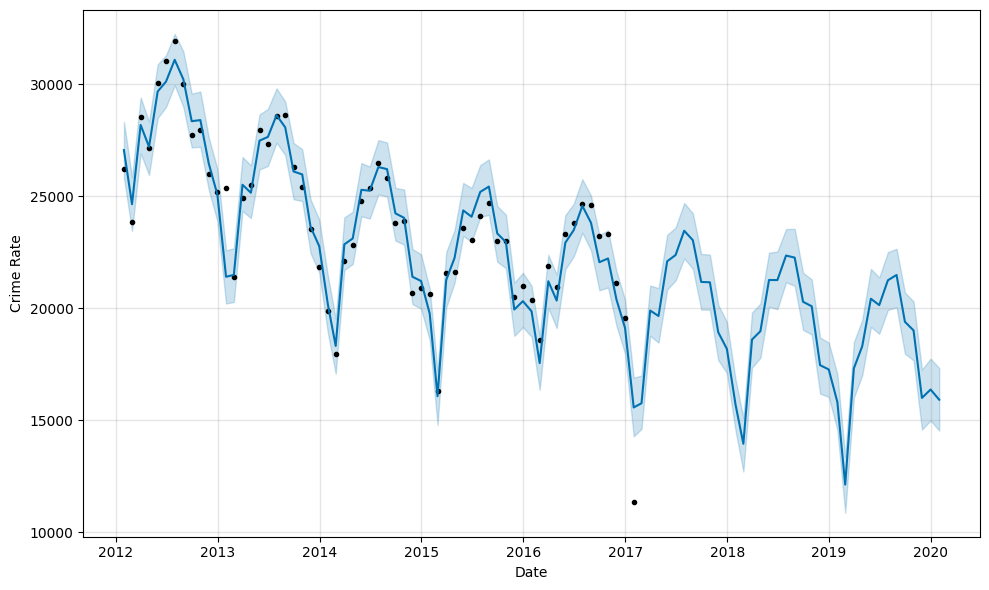

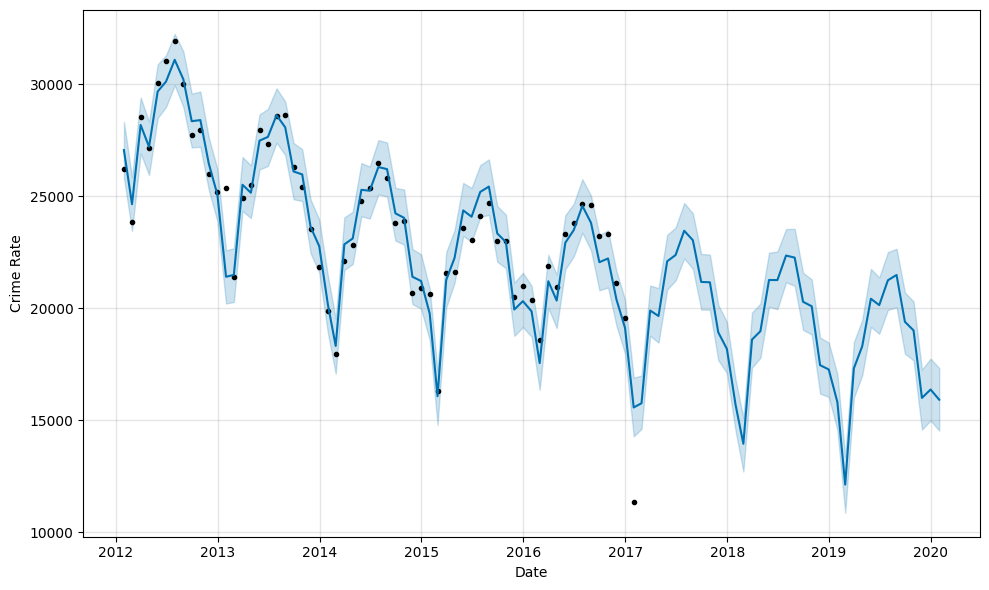

In [83]:
# model.plot(): This function is used to generate the plot.
# prediction: This is the DataFrame containing the forecasted values generated by the Prophet model.
# xlabel="Date": This specifies the label for the x-axis of the plot, indicating the dates from the 'ds' column of the prediction DataFrame.
# ylabel="Crime Rate": This specifies the label for the y-axis of the plot, indicating the forecasted crime rates from the 'yhat' column of the prediction DataFrame.
model.plot(prediction,xlabel="Date",ylabel="Crime Rate")

## Save The Model

In [84]:
# Import few libraries
import json
from prophet.serialize import model_to_json, model_from_json

# This line of code opens the file 'prophet_model.json' in write ('w') mode using a context manager (with statement). 
# It then calls model_to_json(model) to convert the Prophet model (model) to a JSON-compatible dictionary representation. 
# Finally, it uses json.dump() to write this dictionary to the file. 
# his effectively saves the Prophet model to the JSON file in a serialized format.
with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout) 

In [49]:
# This line opens the file 'prophet_model.json' in read ('r') mode using a context manager (with statement).
with open('prophet_model.json', 'r') as fin:
    # json.load(fin) reads the JSON data from the file and converts it into a Python dictionary. 
    # Then, model_from_json() function from Prophet's serialize module is used to deserialize (load) the Prophet model from the JSON data. 
    ChicagoCrimeModel = model_from_json(json.load(fin))  # Load model

In [50]:
# Ask users to enter numbers of months to predict.
x = int(input("Enter Numbers Months to predict:"))

Enter Numbers Months to predict:24


In [85]:
# This line creates a DataFrame pred containing future dates for which you want to make predictions 
# using the loaded Prophet model. 
pred = ChicagoCrimeModel.make_future_dataframe(periods=x ,freq = "M")
# This line uses the loaded Prophet model ChicagoCrimeModel to make predictions for the future dates contained in the DataFrame pred. 
prediction = ChicagoCrimeModel.predict(pred)

In [87]:
# Show the result
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29528.009355,25888.107491,28326.118800,29528.009355,29528.009355,-2468.467606,-2468.467606,-2468.467606,-2468.467606,-2468.467606,-2468.467606,0.0,0.0,0.0,27059.541749
1,2012-02-29,29341.464246,23482.345706,25829.261346,29341.464246,29341.464246,-4698.877805,-4698.877805,-4698.877805,-4698.877805,-4698.877805,-4698.877805,0.0,0.0,0.0,24642.586441
2,2012-03-31,29142.053956,26939.738825,29353.108899,29142.053956,29142.053956,-962.784957,-962.784957,-962.784957,-962.784957,-962.784957,-962.784957,0.0,0.0,0.0,28179.268999
3,2012-04-30,28949.076258,26006.441742,28380.066658,28949.076258,28949.076258,-1744.512377,-1744.512377,-1744.512377,-1744.512377,-1744.512377,-1744.512377,0.0,0.0,0.0,27204.563881
4,2012-05-31,28749.665970,28459.961703,30939.876200,28749.665970,28749.665970,923.695781,923.695781,923.695781,923.695781,923.695781,923.695781,0.0,0.0,0.0,29673.361751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2018-09-30,19700.789941,19076.138751,21542.205694,19459.395697,19976.640634,584.745272,584.745272,584.745272,584.745272,584.745272,584.745272,0.0,0.0,0.0,20285.535213
81,2018-10-31,19617.091598,18852.518818,21323.629913,19357.155056,19913.661981,469.704840,469.704840,469.704840,469.704840,469.704840,469.704840,0.0,0.0,0.0,20086.796439
82,2018-11-30,19536.093202,16371.132529,18761.038249,19254.567295,19858.563574,-2078.708456,-2078.708456,-2078.708456,-2078.708456,-2078.708456,-2078.708456,0.0,0.0,0.0,17457.384746
83,2018-12-31,19452.394860,16071.553437,18519.421413,19149.691629,19799.082324,-2186.771657,-2186.771657,-2186.771657,-2186.771657,-2186.771657,-2186.771657,0.0,0.0,0.0,17265.623203


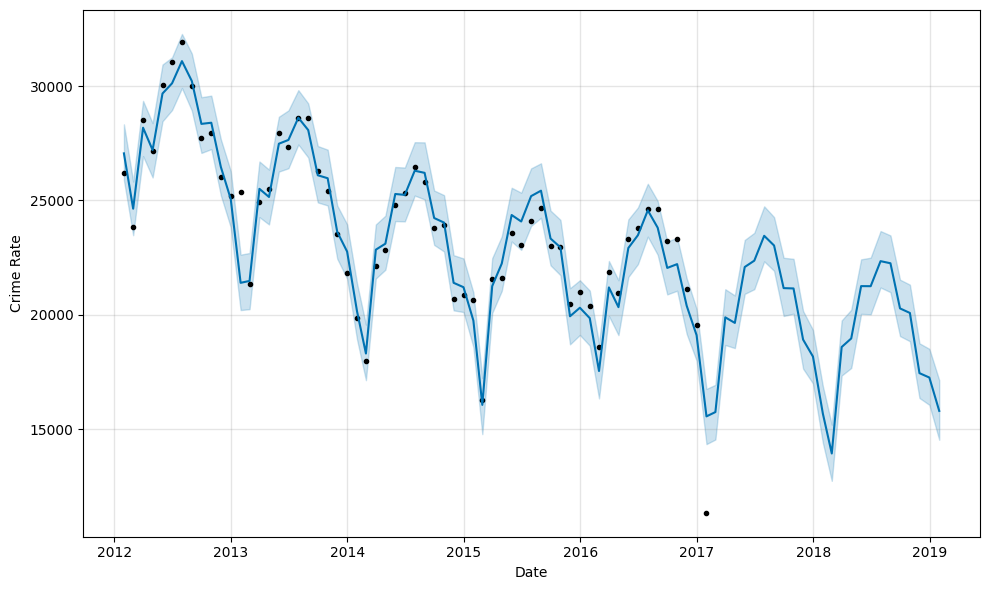

In [88]:
# ChicagoCrimeModel.plot(): This function is used to generate the plot.
# prediction: This is the DataFrame containing the forecasted values generated by the Prophet model.
# xlabel='Date': This specifies the label for the x-axis of the plot, indicating the dates from the 'ds' column of the prediction DataFrame.
# ylabel='Crime Rate': This specifies the label for the y-axis of the plot, indicating the forecasted crime rates from the 'yhat' column of the prediction DataFrame.
figure = ChicagoCrimeModel.plot(prediction, xlabel='Date', ylabel='Crime Rate')

In [89]:
# The Prophet model predicts the future crimes in the city of Chicago. In this case, I can see the crimes would drop as time goes by.